In [65]:
#step 0
#do the necesary imports that you need while you create the code
import numpy as np
import pandas as pd
from skimage import io
from itertools import combinations
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
#step 1
#create 2 dataframes
#read SPY500_descarga.csv from data folder
df=pd.read_csv("data/SPY500_descarga.csv");df.head(5)


,Unnamed: 0,Date,SPY,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,0,2019-12-26,322.940002,85.449997,29.670000,159.270004,72.477501,89.830002,85.050003,171.009995,...,62.790001,98.680000,70.129997,56.529999,78.599998,101.790001,150.300003,254.419998,51.660000,133.029999
1,1,2019-12-27,322.859985,85.419998,28.440001,158.350006,72.449997,89.199997,84.910004,169.270004,...,63.119999,98.419998,69.889999,56.840000,78.839996,101.900002,150.009995,256.000000,51.500000,133.250000
2,2,2019-12-30,321.079987,84.900002,28.299999,159.119995,72.879997,88.519997,83.639999,167.289993,...,63.290001,97.680000,69.480003,56.400002,78.739998,100.639999,148.750000,254.110001,51.770000,132.210007
3,3,2019-12-31,321.859985,85.309998,28.680000,160.160004,73.412498,88.540001,85.019997,170.589996,...,63.490002,97.769997,69.779999,56.590000,78.790001,100.730003,149.679993,255.440002,51.919998,132.350006
4,4,2020-01-02,324.869995,85.949997,29.090000,159.410004,75.087502,89.550003,85.080002,168.809998,...,62.380001,101.650002,70.900002,56.930000,79.849998,102.169998,149.199997,259.140015,52.439999,134.139999


In [67]:
#read SPY500.csv
df_SPY500=pd.read_csv("data/SPY500.csv"); df_SPY500.head(5)

,stocks
0,SPY
1,A
2,AAL
3,AAP
4,AAPL


In [68]:
#step 2
#create a list for stocks in data from SPY500.csv
list_stocks = df_SPY500['stocks'].to_list()
print(list_stocks)

['SPY', 'A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF.B', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BRK.B', 'BRO', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CRL', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DIS

# top 5 and bottom 5 list must look like this 
> ['SPY', 'A', 'AAL', 'AAP', 'AAPL'] **this is the top**.

> ['YUM', 'ZBH', 'ZBRA', 'ZION', 'ZTS'] **this is the tail**.


In [69]:
#step 3
#remove Unnamed: 0 column
df.drop([0])
#Sort index acending = False dataframe from SPY500_descarga
df_SPY500asc= df.sort_index(ascending=False)
df_SPY500asc[['Date','SPY', 'A', 'AAL', 'AAP']].head(10).round(decimals=2)

,Date,SPY,A,AAL,AAP
503,2021-12-23,470.60,157.80,18.26,232.13
502,2021-12-22,467.69,156.78,18.26,232.79
501,2021-12-21,463.06,153.96,18.12,229.57
500,2021-12-20,454.98,150.42,17.30,228.39
499,2021-12-17,459.87,151.42,16.95,232.82
498,2021-12-16,466.45,150.80,16.52,239.16
497,2021-12-15,470.60,154.31,16.99,239.14
496,2021-12-14,463.36,151.88,16.91,235.39
495,2021-12-13,466.57,156.29,17.12,234.12
494,2021-12-10,470.74,156.26,18.01,240.04


# Data must look like this

|     | Date       |    SPY |      A |   AAL |    AAP |
|----:|:-----------|-------:|-------:|------:|-------:|
| 503 | 2021-12-23 | 470.6  | 157.8  | 18.26 | 232.13 |
| 502 | 2021-12-22 | 467.69 | 156.78 | 18.26 | 232.79 |
| 501 | 2021-12-21 | 463.06 | 153.96 | 18.12 | 229.57 |
| 500 | 2021-12-20 | 454.98 | 150.42 | 17.3  | 228.39 |
| 499 | 2021-12-17 | 459.87 | 151.42 | 16.95 | 232.82 |
| 498 | 2021-12-16 | 466.45 | 150.8  | 16.52 | 239.16 |
| 497 | 2021-12-15 | 470.6  | 154.31 | 16.99 | 239.14 |
| 496 | 2021-12-14 | 463.36 | 151.88 | 16.91 | 235.39 |
| 495 | 2021-12-13 | 466.57 | 156.29 | 17.12 | 234.12 |
| 494 | 2021-12-10 | 470.74 | 156.26 | 18.01 | 240.04 |

In [70]:
#step 4
#obtain simple statistics of all dataframe
df_SPY500asc[['Date','SPY', 'A', 'AAL', 'AAP']].describe().round(decimals=3)

,SPY,A,AAL,AAP
count,504.000,504.000,504.000,504.000
mean,372.235,117.861,17.890,169.713
std,60.067,30.096,5.141,36.120
min,222.950,63.370,9.040,75.030
25%,326.535,89.730,13.050,146.432
50%,370.120,117.390,17.990,158.395
75%,425.598,147.355,21.445,202.113
max,470.740,179.280,30.470,241.910


|       |      SPY |        A |       AAL |     AAP |
|:------|---------:|---------:|----------:|--------:|
| count | 504      | 504      | 504       | 504     |
| mean  | 372.235  | 117.861  |  17.8903  | 169.713 |
| std   |  60.0669 |  30.0959 |   5.14066 |  36.12  |
| min   | 222.95   |  63.37   |   9.04    |  75.03  |
| 25%   | 326.535  |  89.73   |  13.05    | 146.432 |
| 50%   | 370.12   | 117.39   |  17.99    | 158.395 |
| 75%   | 425.598  | 147.355  |  21.445   | 202.113 |
| max   | 470.74   | 179.28   |  30.47    | 241.91  |

In [71]:
#step 5
#Set Date column as index
df_SPY500asc[['Date', 'SPY', 'A', 'AAL', 'AAP', 'AAPL']].set_index('Date').round(decimals=2).head(10)

,SPY,A,AAL,AAP,AAPL
Date,,,,,
2021-12-23,470.60,157.80,18.26,232.13,176.28
2021-12-22,467.69,156.78,18.26,232.79,175.64
2021-12-21,463.06,153.96,18.12,229.57,172.99
2021-12-20,454.98,150.42,17.30,228.39,169.75
2021-12-17,459.87,151.42,16.95,232.82,171.14
2021-12-16,466.45,150.80,16.52,239.16,172.26
2021-12-15,470.60,154.31,16.99,239.14,179.30
2021-12-14,463.36,151.88,16.91,235.39,174.33
2021-12-13,466.57,156.29,17.12,234.12,175.74


| Date       |    SPY |      A |   AAL |    AAP |   AAPL |
|:-----------|-------:|-------:|------:|-------:|-------:|
| 2021-12-23 | 470.6  | 157.8  | 18.26 | 232.13 | 176.28 |
| 2021-12-22 | 467.69 | 156.78 | 18.26 | 232.79 | 175.64 |
| 2021-12-21 | 463.06 | 153.96 | 18.12 | 229.57 | 172.99 |
| 2021-12-20 | 454.98 | 150.42 | 17.3  | 228.39 | 169.75 |
| 2021-12-17 | 459.87 | 151.42 | 16.95 | 232.82 | 171.14 |
| 2021-12-16 | 466.45 | 150.8  | 16.52 | 239.16 | 172.26 |
| 2021-12-15 | 470.6  | 154.31 | 16.99 | 239.14 | 179.3  |
| 2021-12-14 | 463.36 | 151.88 | 16.91 | 235.39 | 174.33 |
| 2021-12-13 | 466.57 | 156.29 | 17.12 | 234.12 | 175.74 |
| 2021-12-10 | 470.74 | 156.26 | 18.01 | 240.04 | 179.45 |

In [72]:
#step 6
#Create a diccionary  with name random_dic  like this {number : column, number: column ,....}
Dic = {i : list_stocks[i] for i in range(0,len(list_stocks))}
print(Dic)
#hint ---some SPY500 data is missing because some stocks does not have 2 year period or i coulndt download because API Fails 
#        or they are delisted from the market

{0: 'SPY', 1: 'A', 2: 'AAL', 3: 'AAP', 4: 'AAPL', 5: 'ABBV', 6: 'ABC', 7: 'ABMD', 8: 'ABT', 9: 'ACN', 10: 'ADBE', 11: 'ADI', 12: 'ADM', 13: 'ADP', 14: 'ADSK', 15: 'AEE', 16: 'AEP', 17: 'AES', 18: 'AFL', 19: 'AIG', 20: 'AIZ', 21: 'AJG', 22: 'AKAM', 23: 'ALB', 24: 'ALGN', 25: 'ALK', 26: 'ALL', 27: 'ALLE', 28: 'AMAT', 29: 'AMCR', 30: 'AMD', 31: 'AME', 32: 'AMGN', 33: 'AMP', 34: 'AMT', 35: 'AMZN', 36: 'ANET', 37: 'ANSS', 38: 'ANTM', 39: 'AON', 40: 'AOS', 41: 'APA', 42: 'APD', 43: 'APH', 44: 'APTV', 45: 'ARE', 46: 'ATO', 47: 'ATVI', 48: 'AVB', 49: 'AVGO', 50: 'AVY', 51: 'AWK', 52: 'AXP', 53: 'AZO', 54: 'BA', 55: 'BAC', 56: 'BAX', 57: 'BBWI', 58: 'BBY', 59: 'BDX', 60: 'BEN', 61: 'BF.B', 62: 'BIIB', 63: 'BIO', 64: 'BK', 65: 'BKNG', 66: 'BKR', 67: 'BLK', 68: 'BLL', 69: 'BMY', 70: 'BR', 71: 'BRK.B', 72: 'BRO', 73: 'BSX', 74: 'BWA', 75: 'BXP', 76: 'C', 77: 'CAG', 78: 'CAH', 79: 'CARR', 80: 'CAT', 81: 'CB', 82: 'CBOE', 83: 'CBRE', 84: 'CCI', 85: 'CCL', 86: 'CDAY', 87: 'CDNS', 88: 'CDW', 89: 'CE',

# dictionary must look like this
{0: 'SPY', 1: 'A', 2: 'AAL', 3: 'AAP', 4: 'AAPL', 5: 'ABBV', 6: 'ABC',....}

In [73]:
#step 7

#Manage missing data of your dataframe in the way you want
df_SPY5002 = df_SPY500asc.isnull().sum(axis=0).sort_values(ascending=False)
df_SPY5002
# This fuction allows me to see where are missing values before taking any decision.

#hint ---- Remember to update your list from step 2.
#hint ---- Some companies of stocks actualy have less than 2 years of data because they have less than 2 year of existance in the market
#          if you make a mean of the data you will be manipulating the numbers and its a investment descition
#          arround 1 billion dollars will be managed by this analysis so think the analysis only works well with arround 2 years of data.
#          if you make a mistake people may will lose their job and their life savings.
#          take a decisiton and explain why you take it.


OGN           348
CARR           57
OTIS           57
KSU             7
Unnamed: 0      0
             ... 
EQR             0
EQIX            0
EOG             0
ENPH            0
ZTS             0
Length: 506, dtype: int64

In [74]:
df_SPY500asc2 = df_SPY500asc.sort_index(ascending=True)
df_SPY500asc2 = df_SPY500asc2.drop(range(0,57), axis=0)
df_SPY500asc2 = df_SPY500asc2.drop(['OGN','KSU'], axis =1)
df_SPY500asc2

,Unnamed: 0,Date,SPY,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
57,57,2020-03-19,240.509995,65.760002,10.290000,85.970001,61.195000,71.059998,86.000000,140.509995,...,57.990002,75.459999,34.430000,35.110001,64.459999,62.599998,89.139999,185.070007,27.250000,102.330002
58,58,2020-03-20,228.800003,66.459999,10.380000,75.029999,57.310001,68.820000,80.610001,130.509995,...,50.630001,71.860001,32.740002,32.820000,59.889999,58.080002,85.980003,179.380005,25.580000,100.940002
59,59,2020-03-23,222.949997,63.369999,10.250000,78.500000,56.092499,64.500000,73.930000,132.339996,...,50.000000,72.000000,31.450001,31.900000,56.639999,56.520000,80.809998,170.720001,24.080000,92.660004
60,60,2020-03-24,243.149994,67.000000,13.920000,86.379997,61.720001,67.489998,79.849998,143.669998,...,54.049999,76.910004,35.439999,33.810001,62.000000,69.660004,93.400002,180.550003,25.180000,103.760002
61,61,2020-03-25,246.789993,69.000000,15.390000,90.370003,61.380001,67.910004,75.349998,146.889999,...,55.549999,75.019997,37.290001,35.000000,63.860001,72.870003,96.830002,186.229996,25.850000,108.209999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,499,2021-12-17,459.869995,151.419998,16.950001,232.820007,171.139999,129.529999,125.180000,315.549988,...,67.000000,200.139999,60.029999,53.410000,115.809998,131.929993,120.849998,588.520020,61.200001,234.309998
500,500,2021-12-20,454.980011,150.419998,17.299999,228.389999,169.750000,130.860001,126.010002,316.230011,...,67.120003,196.149994,59.160000,52.590000,114.050003,131.570007,118.889999,570.780029,59.400002,234.259995
501,501,2021-12-21,463.059998,153.960007,18.120001,229.570007,172.990005,129.949997,127.610001,332.200012,...,66.339996,206.429993,60.500000,52.970001,115.980003,133.369995,122.459999,580.210022,61.650002,237.639999
502,502,2021-12-22,467.690002,156.779999,18.260000,232.789993,175.639999,132.050003,127.809998,343.399994,...,66.730003,215.000000,60.990002,54.389999,116.160004,134.630005,124.730003,580.429993,61.860001,241.570007


In [53]:
#step 8
#Explain your decisition of how you managed the missing data
# I will delete OGN becuase we do not have enough data to be considered in the analysis and I will delete KSU as well becuase it looks like this stock is not anymore in the SPY500.
# CARR and OTIS have a hugh volume of data available, so I will prefer to delete some rows of data from the dataset but to keep these 2 stocks than delete them.

In [75]:
# List updated
list_stocks = [e for e in list_stocks if e not in ('OGN', 'KSU')]
print(list_stocks)

['SPY', 'A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF.B', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BRK.B', 'BRO', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CRL', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DIS

In [76]:
#step 9
#We are going to plot some data in orde to see if they have some logic that we can apply it, lets explore it
#Create a list or a function that get 9 random numbers with the max number as the  max lenght of your stock list updated.

import random
number9 = [0] + [random.randrange(1,502) for i in range(8)]
number9


[0, 341, 82, 417, 428, 268, 179, 499, 140]

In [77]:
stocks = [list_stocks[index] for index in number9]
df_stocks = df_SPY500asc2[stocks]
df_stocks

,SPY,NVDA,CBOE,SRE,TAP,KMX,FAST,YUM,DLR
57,240.509995,53.242500,82.910004,100.000000,38.509998,48.130001,32.299999,62.599998,125.269997
58,228.800003,51.437500,79.690002,99.639999,36.939999,44.270000,28.740000,58.080002,121.199997
59,222.949997,53.172501,76.540001,93.419998,34.560001,47.700001,28.180000,56.520000,107.900002
60,243.149994,62.294998,78.150002,104.029999,37.470001,56.320000,31.370001,69.660004,116.720001
61,246.789993,61.404999,80.000000,114.019997,37.540001,63.880001,30.230000,72.870003,121.430000
...,...,...,...,...,...,...,...,...,...
499,459.869995,278.010010,128.250000,126.870003,44.740002,137.539993,62.049999,131.929993,171.539993
500,454.980011,277.190002,125.970001,127.550003,43.380001,131.750000,61.320000,131.570007,171.149994
501,463.059998,290.750000,125.919998,128.509995,44.540001,136.990005,61.590000,133.369995,169.880005
502,467.690002,294.000000,129.190002,129.160004,44.660000,127.870003,62.040001,134.630005,171.410004


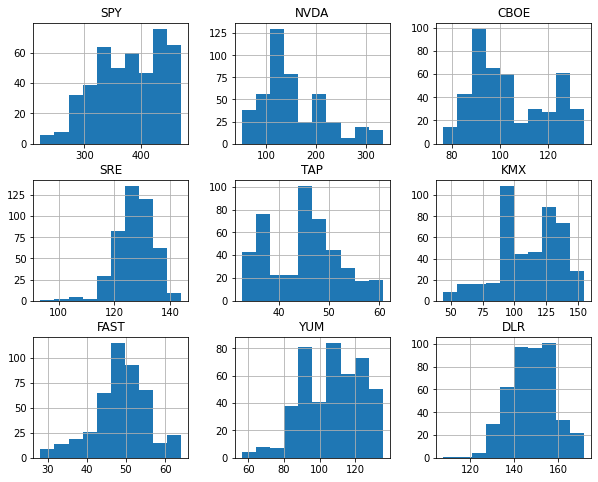

['SPY', 'NVDA', 'CBOE', 'SRE', 'TAP', 'KMX', 'FAST', 'YUM', 'DLR']
[0, 341, 82, 417, 428, 268, 179, 499, 140]


In [83]:
#step 10
#Create a figure  3 columns and 3 rows and plot a histogram random stocks on it,
#each graph must have the name of the stock 
import matplotlib.pyplot as plt
%matplotlib inline
df_stocks.hist(layout = (3,3), figsize = (10,8))
plt.show()

#print your list of the stocks
print(stocks)
print(number9)
#hint --- you can use random from numpy and use the dictionary  and the function or list we have made to select the information 
#         from your dataframe
#hint --- SPY is an index of 500 stocks that means it has a partial number of percentage of each stock is in your data, its your brenchmark

# No Mater how much i run it it allways give 0 cause the first item in the list
[0, 479, 14, 404, 272, 94, 261, 316, 63]

[0, 446, 176, 419, 116, 278, 417, 459, 284]

[0, 239, 367, 403, 449, 274, 382, 335, 15]

[0, 373, 466, 321, 93, 185, 107, 422, 256]

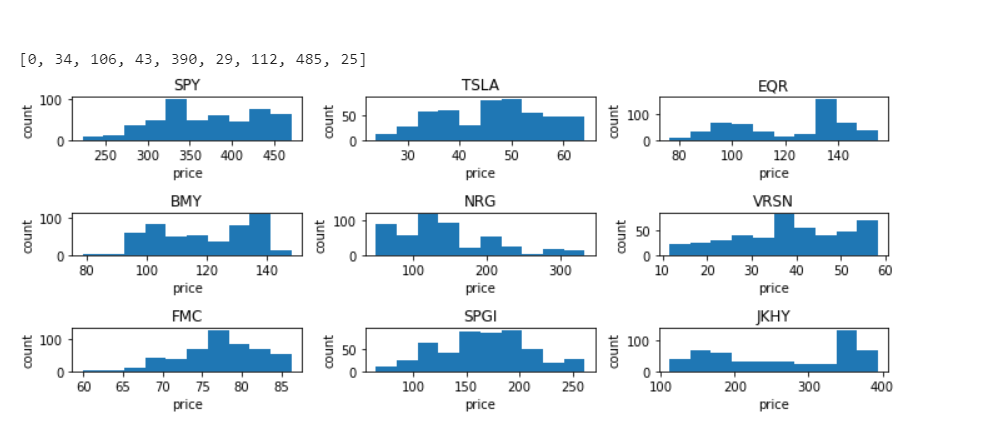

In [12]:
from IPython.display import Image
Image(filename='image.png')
#your output and graph must be something like this because its random except SPY stock at position 0,0

In [13]:
# Step 11
#save your Dataframe as Csv or picke las Cleaned_SPY500.csv or Cleaned_SPY500.pkl
df_stocks.to_csv('DF_SP500.csv')


In [14]:
# Step 12 answer some questions about the data


#1.-what does the data is telling you?
#I cannot see any pattern followed by the different random selected stocks

#2.-the prices are close to the same range? why or why not?
#Absolutely not, the price range is completely different going from 10 dollars to 400 or 500 dollars.

#3.-how i can know if a specific stock is following or not the brenchmark?
#I would check if the stock price is align with the most repeated price for that specific stock, and if yes, I would say that the stock price is following the benchmark
#4.-how i can compare 2 diferent stocks of diferent prices?
# I can normalize the data

In [79]:
# Step 13
# CREATE A DATAFRAME  with 10 stocks you pick as top stocks based in youe feelings and information you know or select it randomly
# first column your name, second column the ticker of the stock
marta_stockporfolio = pd.DataFrame({'Name':['Marta Vergel','Marta Vergel','Marta Vergel','Marta Vergel','Marta Vergel','Marta Vergel','Marta Vergel','Marta Vergel','Marta Vergel','Marta Vergel'],'Ticker':['FMC', 'GPS', 'CTAS', 'SBAC', 'SBUX', 'SCHW', 'SEE', 'SHW', 'SIVB', 'SJM']})
marta_stockporfolio


,Name,Ticker
0,Marta Vergel,FMC
1,Marta Vergel,GPS
2,Marta Vergel,CTAS
3,Marta Vergel,SBAC
4,Marta Vergel,SBUX
5,Marta Vergel,SCHW
6,Marta Vergel,SEE
7,Marta Vergel,SHW
8,Marta Vergel,SIVB
9,Marta Vergel,SJM


In [62]:
#save it as my_portfolio.pkl or my_portfolio.csv
marta_stockporfolio.to_csv('marta_stockportfolio.csv')